<a href="https://colab.research.google.com/github/cu-applied-math/stem-camp-notebooks/blob/master/2021/MachineLearning/handwritten_digits_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About this tutorial 

This tutorial is a hands-on introduction to machine learning for beginners. 

Here, my goal is to help you with a concrete example of image recognition, with just a little bit of code, and no maths. 

After a short introduction to machine learning, you will learn: 

* the principles of supervised machine learning for classification,
* how to access and validate the training data for your network,
* how to create and train your network
* how to use the trained and test its performance.

## Why machine learning? 

Machine learning is a field of artificial intelligence in which a system is designed to learn automatically given a set of input data. After the system has learnt (we say that the system has been trained), we can use it to make predictions for new data, unseen before. 

This approach makes it possible to solve complex problems which are difficult or impossible to solve with traditional sequential programming. 

Examples of machine learning applications include: 

* autonomous cars: given the data from sensors like cameras and radars, the car is trained to drive on its own. [The one of google still needs to learn about the right lane](https://www.youtube.com/watch?v=TsaES--OTzM) ;-) 
* drones: the drone pilot only needs to give simple instructions (up, down, left, right, or just 3D coordinates), and the drone automatically performs complex adjustments to keep stability, or to [fly in formation](https://www.youtube.com/watch?v=VnTQTm7vNbY)
* [robots](https://www.youtube.com/watch?v=LikxFZZO2sk) 
* predicting real estate price from a set of variables like location, number of rooms, and even the text of the real estate ad. I'll certainly do a tutorial about that in the near future.
* google ads that predict the probability for you to be interested in a given ad to send you the most promising ones
* collaborative recommendation systems that give you the youtube videos or amazon products you will like
* defect identification on production chains
* identification of clusters of like-minded people on the social networks, and of the most important influencers within these groups
* tagging photos (just type cat or food in the search box of your google photos library if you have one)
* translation systems like [google translate](https://translate.google.fr/?hl=en)
* spam email filtering
* automatically generate paintings: [deep dream](https://deepdreamgenerator.com/#gallery), [neural doodle](https://github.com/alexjc/neural-doodle)
* ...

## Machine learning for classification

Let's get a feel for how a neural network can be trained for classification. 

Our goal is to get started hands on with machine learning fast and easy, so I'm only going to give you a simplified explanation for now.

![Supervised learning](https://github.com/cbernet/maldives/raw/master/handwritten_digits_sklearn/supervised_learning.png)

The network is presented with a succession of training examples. Each training example consists of: 

* the image of a digit
* a label, which tells us which digit the image truly represents. For a given image, the label could be told to us by the person who wrote the digit in the first place. 

In the drawing above, the first image is processed by the neural network, which produces an answer: this is a 9. 

At first, the connections between the neurons in the network are random, and the network is not able to do anything useful. It just provides a random answer. 

The answer is compared to the label. In this case, the answer (9) is different from the label (the digit is actually a 3), and some feedback is given to the neural network so that it can improve. The connections between the neurons are modified, favoring the ones that tend to give a correct answer. 

After the modification, the next examples are considered, and the neural network learns in an iterative process. 

The number of training examples needed to train the network properly could be of the order of a few hundred for networks with a simple architecture, and millions for complex networks.

### Packages

We will use a variety of tools from [scipy](https://www.scipy.org/), the scientific python library: 

* [scikit-learn](https://scikit-learn.org/): one of leading machine-learning toolkits for python. It will provide an easy access to the handwritten digits dataset, and allow us to define and train our neural network in a few lines of code
* [numpy](http://www.numpy.org/): core package providing powerful tools to manipulate data arrays, such as our digit images
* [matplotlib](https://matplotlib.org/): visualization tools, essential to check what we are doing
* [jupyter](https://jupyter.org/): the web server that will allow you to follow this tutorial and run the code directly in your web browser. 

Scipy is actually not a single library, but an "ecosystem" of interdependent python packages.

You'll train your first neural net easily and in the process, you'll get an understanding of the most important scikit-learn, numpy, and matplotlib tools. That's more than enough for a variety of machine learning tasks, and you can always learn more about specific features of these tools when you need them later on (you'll know!) 
---

Notebook came from: https://github.com/cbernet/maldives/archive/master.zip


## The digits dataset

scikit-learn comes with several test datasets. Let's load the handwritten digits dataset:

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

In python, the `dir` function returns the names of the attributes of an object, in other words which information is stored in the object in the form of other objects. Let's use this function to check what can be found in the digits object:

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Let's have a look in more details at some of these attributes. We are going to start by checking their type:

In [ ]:
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


`images` and `target` are ndarrays (N-dimensional arrays) from the numpy package. The shape attribute of an ndarray gives the number of dimensions and the size along each dimension of the array. For example:

In [1]:
# TO DO
# Get the dimensions of the images

digits.image is an array with 3 dimensions. The first dimension indexes images, and we see that we have 1797 images in total. The next two dimensions correspond to the x and y coordinates of the pixels in each image. Each image has 8x8 = 64 pixels. In other words, this array could be represented in 3D as a pile of images with 8x8 pixels each. 

let's look at the data of the first 8x8 image. Each slot in the array corresponds to a pixel, and the value in the slot is the amount of black in the pixel

In [ ]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Now let's display this image: (try rerunning this cell if you don't see the image)

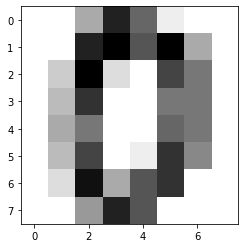

In [ ]:
import matplotlib.pyplot as plt
# TO DO: display the image

The image is low resolution. The original digits were of much higher resolution, and the resolution has been decreased when creating the dataset for scikit-learn to make it easier and faster to train a machine learning algorithm to recognize these digits. 

Now let's investigate the target attribute: 

In [ ]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


It is a 1-dimensional array with 1797 slots. Looking into the array, we see that it contains the true numbers corresponding to each image. For example, the first target is 0, and corresponds to the image drawn just above. 

Let's have a look at some more images using this function: 

In [ ]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

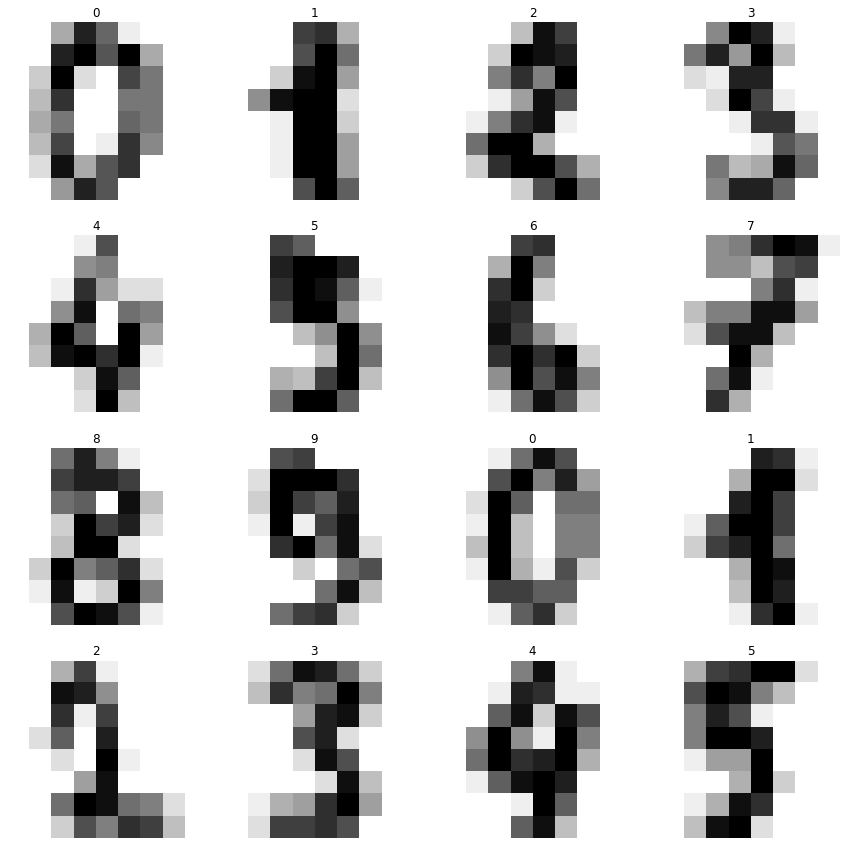

In [ ]:
plot_multi(0)

you can have a look at the next digits by calling `plot_multi(16)`, `plot_multi(32)`, etc. You will probably see that with such a low resolution, it's quite difficult to recognize some of the digits, even for a human. In these conditions, our neural network will also be limited by the low quality of the input images. Can the neural network perform at least as well as a human? It would already be an achievement! 

## Building the network and preparing the input data

With [scikit-learn](https://scikit-learn.org), creating, training, and evaluating a neural network can be done with only a few lines of code. 

We will make a very simple neural network, with three layers: 

* an input layer, with 64 nodes, one node per pixel in the input images. Nodes are neurons that actually do nothing. They just take their input value and send it to the neurons of the next layer
* a hidden layer with 15 neurons. We could choose a different number, and also add more hidden layers with different numbers of neurons
* an output layer with 10 neurons corresponding to our 10 classes of digits, from 0 to 9. 

This is a *dense* neural network, which means that each node in each layer is connected to all nodes in the previous and next layers. 

![Simple dense network](https://github.com/cbernet/maldives/raw/master/handwritten_digits_sklearn/simple_dense.png)

The input layer requires a 1-dimensional array in input, but our images are 2D. So we need to flatten all images:

In [ ]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

We now have 1797 flattened images. The two dimensions of our 8x8 images have been collapsed into a single dimension by  writing the rows of 8 pixels as they come, one after the other. The first image that we looked at earlier is now represented by a 1-D array with 8x8 = 64 slots. Please check that the values below are the same as in the original 2-D image. 

In [ ]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

let's now split our data into a training sample and a testing sample:

In [ ]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

The first 1000 images and labels are going to be used for training. The rest of the dataset will be used later to test the performance of our network. 

We can now create the neural network. We use one hidden layers with 15 neurons, and scikit-learn is smart enough to find out how many numbers to use in the input and output layers. Don't pay attention to the other parameters, we'll cover that in future posts.

In [ ]:
from sklearn.neural_network import MLPClassifier

# Notice we have an object which is an instance of the class MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)


Finally, we can train the neural network: 

In [2]:
# TO DO: 
# fit the model

The training was extremely fast because the neural network is simple and the input dataset is small. Now that the network has been trained, let's see what it can say about our test images:

In [ ]:
predictions = mlp.predict(x_test)
predictions[:50] 
# we just look at the 1st 50 examples in the test sample

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

These predictions should be fairly close to the targets of our training sample. Let's check by eye (please compare the values of these arrays)

In [ ]:
y_test[:50] 
# true labels for the 1st 50 examples in the test sample

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

Not bad! we see that most (if not all) predictions match the true labels. We can also visually inspect the results of the predictions below.

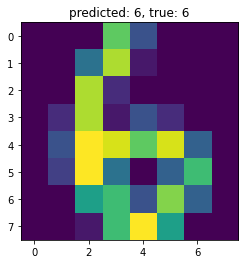

In [ ]:
img_num = 7
plt.imshow(x_test[img_num].reshape(8,8))
plt.title("predicted: {}, true: {}".format(predictions[img_num], y_test[img_num]))
plt.show()

But can we be a bit more quantitative? We can compute the accuracy of the classifier, which the probability for a digit to be classified in the right category. Again, scikit-learn comes with a handy tool to do that: 

In [ ]:
from sklearn.metrics import accuracy_score
# Get the accuracy of the model using accuracy_score

0.9146800501882058

This number is the probability for the digits in the test sample to be classified in the right category, meaning that we get 91.6% of the digits right, and 8.4% wrong. 

**We managed to get an 91.6% accuracy with this very simple neural network. Not too bad!**

However, this is only a first try.  

## Conclusion and outlook

In this hands-on tutorial, you have learned: 

* The principles of supervised machine learning for classification,
* How to investigate about your input dataset,
* How to train a neural network for image recognition, reaching an accuracy larger than 90% for digit classification.

It's only the beginning!